# Assignment 1: Simulating Ecological Homeostasis

## Background: The Gaia Hypothesis & Daisy World
In the 1970s, James Lovelock and Lynn Margulis developed the *Gaia Hypothesis*. This is a
highly controversial theory which proposes that the global ‘biosphere’ is self-regulating—
that ecosystems work to maintain the conditions necessary life to persist on Earth. As a
case in point to support his theory, Lovelock observed that the amount of heat arriving
from our Sun has increased significantly since the origin of life, but that the tempera-
ture of the planet has remained within the limits of hability throughout. How does this
homeostasis (loosely translatable as ‘keeping things the same’) occur?

Lovelock argues that the homeostasis is a natural biproduct of complex ecosystems,
but this is a very controversial claim, because it seems to contradict classic ideas of
evolution being driven by selfish competition and ‘survival of the fittest.’ Lovelock’s
theory suggests that instead of competing and ‘being selfish,’ diverse species come to
some sort of agreement, whereby they’ll cooperate to make conditions beneficial for all
life (and not just themselves). If you are interested to know more, the wikipedia page
on the ‘Gaia Hypothesis’ provides some more information including links to further
reading.

Debate concerning the Gaia Hypothesis continues today. A computational model
known as ‘Daisy World’ has been developed to show how regulation of environmental
conditions (such as the temperature of the planet) can happen. The model considers
a planet populated by two different types of daisies, black ones and white ones. The
black daisies increase the temperature (by a small amount) by absorbing sunlight, and
the white ones reflect light back into space, decreasing the local temperature. In this
assignment, we will develop a simplified version of Daisy World that only includes the
white daisies.

As is common in developing computational models, we will make many simplifying
assumptions. We will assume:

1. the daisies grow better at certain temperatures than others;

2. the temperature of the planet is the same everywhere;

3. daisies are the only relevant species that lives on the planet;

4. the carrying capacity (i. e. the number of daisies that are alive at equilibrium) is well approximated as a function of temperature;

5. when there are no daisies around, it is still possible for a population to grow (we can imagine there are always seeds in the ground).

## Model

Our model will be a continuous-time dynamical system that is described by three differ-
ential equations. Each equation describes the dynamics of one of the following variables.

* $n$ -- the normalized population density of daises. 1 means the planet is covered in the maximum possible density of daises and 0 means there are no daisies at all, etc.

* $y$ - the temperature of the planet (this corresponds in our simplified model to the temperature everywhere)

* $p$ - an external ‘perturbing’ force to the temperature. This can be conceived of as an increase in the radiation from the star that the planet is orbiting, or any other (combination) of factors that are modifying the planet’s temperature other than the presence of the daisies.

In this assignment, as you follow the instructions, you will build a computational model
of this system. By the end of it hopefully you will have gained some insight into one
way that biological-feedback can (at least in theory) stabilise environments as claimed by
Lovelock and Margulis.

### Step 1: Write a function that maps the temperature to the carrying capacity of the daisies.

In our equations, the *carrying capacity* is written $k$. It describes the equilibrium population density, i. e. what the population density (n) would move toward if everything else were held constant. Assumption 4 tells us that we can $k$ is well approximated as some function of temperature ($y$):

$$ k = f(y) $$

A typical response of a carrying capacity to an environmental feature such as temperature is a Gaussian function:

$$ k = f(y) = a \cdot \exp \left ( -\frac{(y-b)^2}{2c^2} \right) $$

In this equation, there are three parameters ($a$, $b$ and $c$). $a$ specifies the height of the curve’s peak; $b$ specifies the position of the maximum; and $c$ specifies the standard deviation, i. e. the ‘width’ of the curve.

What values for these parameters should we use? $n$ is normalized, so the peak of the curve should be 1. Let us assume that the daisies grow best at a temperature of $25^o$ C. and that the standard deviation is 3.

**Q1a.** Write a Python function that takes y as an argument and returns k.

In [1]:
## Q1a answer goes here...

import math
import matplotlib.pyplot as plt
import numpy as np

def carrying_capacity(y):
    a = 1 # height
    b = 25 # max
    c = 3 # sd
    k = a * math.exp(- (y - b) ** 2 / (2 * c ** 2))
    return k

**Q1b.** To confirm that your function is correct, plot it for suitable values of y. 

FOR ALL PLOTS LABEL AXES AND PROVIDE TITLES OR POINTS WILL BE LOST!

Text(0.5, 1.0, 'Capacity of the Daisies')

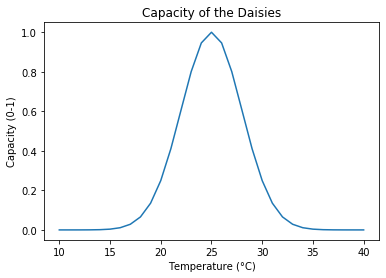

In [2]:
## Q1b answer goes here...
%matplotlib inline

temp_array = np.array([x for x in range(10, 41, 1)]) # temperature array

fig1, ax1 = plt.subplots()

ax1.plot(temp_array, np.array([carrying_capacity(x) for x in temp_array]), label="k")  

ax1.set_xlabel('Temperature (°C)')
ax1.set_ylabel('Capacity (0-1)')
ax1.set_title("Capacity of the Daisies")

### Step 2: Describing how daisy density changes over time.

In our model, the population density ($n$) changes as a function of the current population density ($n$) and the current carrying capacity ($k$):

$$ \frac{dn}{dt} = g(n,k) $$

We shall model $n$ as always approaching the carrying capacity, with a rate of this approach that is linearly proportional to the difference between the current population density and the carrying capacity. The scale of the response (i. e., the slope of the line), $s = 0.5$.

**Q2a.** Write down (in math notation, not code) the differential equation that captures what has just been described above. If it is not clear to you how to do this, think about what a graph of this function should
look like. Use pencil and paper to think this through.

Double click on the word ANSWER below, to edit the markdown. Your answer here should sit between the two sets of \$\$ \$\$ to be displayed as latex math. When you've written an equation, to see it rendered as math, run the cell (I hit control-enter to do so).

The basics of latex math in markdown can be found here: https://www.latex-tutorial.com/tutorials/amsmath/



$$ \frac{dn}{dt} = g(n,k) = s \cdot (k - n) = 0.5 \cdot (k - n) $$

**Q2b.** Translate the above mathematical equation into a Python function that takes two
arguments (n and k) and returns the rate at which n changes. In other words, fill in the
following blank.

In [3]:
## Q2b answer goes here...

def dndt(n,k):
    s = 0.5 # slope
    return s * (k - n)

**Q2c.** To confirm that your function is working how it should be, plot $g (n,k)$ for an appropriate range of values of n, with k = 0.5.



Text(0.5, 1.0, 'g(n, k)')

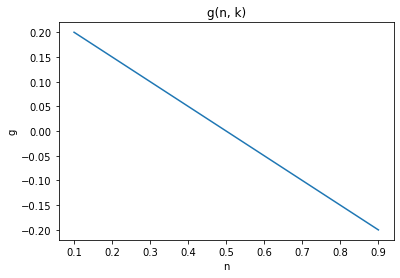

In [4]:
## Q2c answer goes here...

n = [0.1, 0.3, 0.5, 0.7, 0.9]
g5 = [dndt(x, 0.5) for x in n]

fig2, ax2 = plt.subplots()

ax2.plot(n, g5, label="g(n, 0.5)")  

ax2.set_xlabel('n')
ax2.set_ylabel('g')
ax2.set_title("g(n, k)")

**Q2d.** Super-impose on the same plot g ( n, k ) when k is fixed to one or two other values
(you pick the values).

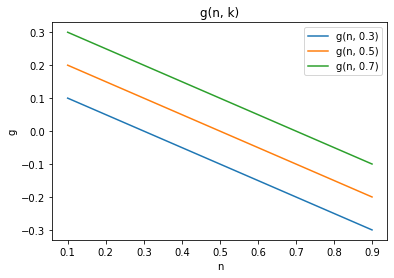

In [5]:
n = [0.1, 0.3, 0.5, 0.7, 0.9]
g3 = [dndt(x, 0.3) for x in n]
g5 = [dndt(x, 0.5) for x in n]
g7 = [dndt(x, 0.7) for x in n]

fig3, ax3 = plt.subplots()

ax3.plot(n, g3, label="g(n, 0.3)")
ax3.plot(n, g5, label="g(n, 0.5)")
ax3.plot(n, g7, label="g(n, 0.7)")

ax3.set_xlabel('n')
ax3.set_ylabel('g')
ax3.set_title("g(n, k)")
ax3.legend()

**Q2e.** In a sentence or two, describe why the above plots confirm that this function is working correctly. DON’T 
FORGET TO LABEL YOUR PLOTS.

First of all, we know that this function $\frac{dn}{dt} = g(n, k) $ should equal zero when it's at the carrying capacity, if we draw the line $g(n) = 0$, the intersection of this line and all three plots are the carrying capacities of each one of them, so it confirms. Also, the density should increase before reaching capacity and decrease after, from the graph, we observe that the graph is above zero line before reaching capacity and negative after, so we can conclude this function is working correctly.

### Step 3: Describing how temperature changes over time.

The temperature changes at a rate proportional to the sum of (1) the influence of every-thing *other than* the daisies, which is captured by the variable $p$, and (2) the influence of the daisies. The influence of the daisies will be linearly proportional to their density, giving us the following differential equation,

$$ \frac{dy}{dt} = p + rn $$

where $r$ is a constant that describes the amount of influence that the daisies have. We’ll assign this parameter a value of $r = -10$, which can be interpreted as saying that when the daisies are at their maximum possible density, they bring the global temperature down by 10 degrees.

**Q3.** Translate the above Equation into a Python function as you did with the differential equation for $n$.

In [6]:
## Q3 answer goes here...

def dydt(n, p, r):
    return p + r * n

### Step 4: Non-daisy influence

Let us imagine that the radiation of the sun is increasing at an increasing rate. This can be described using the following differential equation, where $q = 0.02$ is a constant representing the rate of that increase and $t$ represents the amount of time that has passed since the start of the simulation.

$$ \frac{dp}{dt} = h(t) = qt $$

**Q4.** Translate this differential Equation into a Python function as you have done with the differential equations for $n$ and $y$.



In [7]:
## Q4 answer goes here...

def dpdt(t):
    q = 0.02
    return q * t

At this point you should have four Python functions:

 
    def k(...):
        """returns carrying capacity"""
        ...

    def dndt(...):
        """returns rate of change of population density """
        ...

    def dydt(...):
        """returns rate of temperature change"""
        ...

    def dpdt(...):
        """returns rate of change of non-daisy infl. upon temperature"""
        ....
        
**Q5.** Write a trajectory function that uses these functions to simulate a trajectory from the initial condition that is passed in as an argument. 

Your function should use the Euler integration we have learned about in class, and must NOT use an existing library (e.g. scipy) to solve the integration. The functions signature should look like this, where the final argument (‘dur’) indicates the duration of the trajectory to simulate.

    def trajectory(init_n, init_y, init_p, dur) :
    ...
    
    
Tips:

* Experiment to pick an appropriate time step value.

* Be careful to pass time (and not the time step or the iteration count) to dpdt().

* Make your code as clear and understandable as you can to improve chances of getting partial credit.
    

In [8]:
## Complete this to answer Q5

def trajectory(init_n, init_y, init_p, r, dur) :
    
    dt = 1e-2
    n_steps = int(dur / dt)
    n, y, p, t = [np.zeros(n_steps) for _ in range(4)]
    n[0], y[0], p[0], t[0] = (init_n, init_y, init_p, 0)
    
    for i in range(1, n_steps):
        
        k = carrying_capacity(y[i - 1])
        
        n[i] = n[i - 1] + dndt(n[i - 1], k) * dt
        y[i] = y[i - 1] + dydt(n[i - 1], p[i - 1], r) * dt
        p[i] = p[i - 1] + dpdt(t[i - 1]) * dt
        t[i] = t[i - 1] + dt
#         print(f"i{i} at time {t[i]}: [n:{n[i]}, y:{y[i]}, p:{p[i]}]\n")
    
    return n, y, p, t, n_steps

### Step 6: Plotting results and interpretation
Simulate a trajectory that starts with $n_0 = y_0 = p_0 = 0$ and that runs for 45 time units.

**Q6a.** On a labelled figure, plot a time-series that shows how the population density
changes over the course of the simulation.

Text(0.5, 1.0, 'Time series of population density')

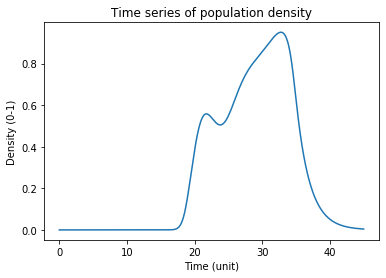

In [9]:
n, y, p, t, n_steps= trajectory(0, 0, 0, -10, 45) # I.C. : 0, 0, 0 with r = -10 in 45 unit time

fig4, ax4 = plt.subplots()

ax4.plot(t, n, label="n")

ax4.set_xlabel('Time (unit)')
ax4.set_ylabel('Density (0-1)')
ax4.set_title("Time series of population density")

**Q6b.** On a separate labelled figure, plot a time-series that shows how the temperature
changes over the course of the simulation.

Text(0.5, 1.0, 'Time series of temperature')

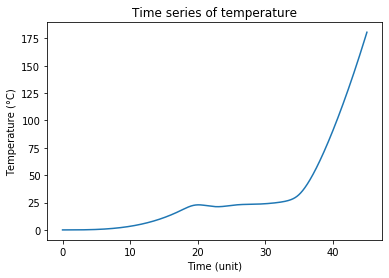

In [10]:
fig5, ax5 = plt.subplots()

ax5.plot(t, y, label="y")

ax5.set_xlabel('Time (unit)')
ax5.set_ylabel('Temperature (°C)')
ax5.set_title("Time series of temperature")

**Q6c.** Superimposed on the same figure as Q6b, plot a time-series that shows how the temperature would have changed if the daisies had no influence upon temperature. Label which line is which using a legend.

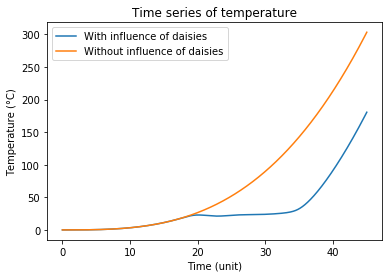

In [11]:
nWO, yWO, pWO, t, n_steps = trajectory(0, 0, 0, 0, 45) # 4th arg r = 0 means no influence

fig6, ax6 = plt.subplots()

ax6.plot(t, y, label="With influence of daisies")
ax6.plot(t, yWO, label="Without influence of daisies")
# ax6.plot(t, [(1/300) * x ** 3 + 0.3 * x for x in t], label="cubic")

ax6.set_xlabel('Time (unit)')
ax6.set_ylabel('Temperature (°C)')
ax6.set_title("Time series of temperature")
ax6.legend()

**Q7.** Interpret the results. What has happened? What are the striking features about the trajectories? What affects them? What conclusion(s) can we draw from the simulation? Write a short paragraph summarizing your interpretation.

From the graph above we can see that two plots are almost identical before time 20, then there's a interval of time where with the influence of daisies, the temperature remains steady at about 25°C then it blows up. If there's no influence of daisies, the temperature will keep on growing at an increasing rate, if we solve the differential equation, which is quite easy by hand, we can conclude that $$y = \frac{1}{300}t^3 + C_1t + C_2, \,\, \text{where}\,\,C_1, C_2 \in \mathbb{R}$$ if no influence of daisies. As for the case where we have to consider the influence of the daisies, we know at around time 20, the temperature is at about 25°C, which is very suitable for the growth of the daisies, hence, the density will hit a small local peak 0.6 at around time 20 which can be verified by the plot of the density time series. As we all know, $$\frac{dy}{dt} = p + r \cdot n = 0.01t^2 + C_1 - 10n$$ since there isn't any significant change to the temperature, $\frac{dy}{dy} \approx 0$ implies the external perturbing forces to the temperature p should balance out the influence from the daisies. However, as time goes on, the external perturbing force increases to a level strong enough so that the influence from the daisies isn't enough to offset it or to say $p \gg r \cdot n$, then the external force will be the dominant factor to influence the temperature and temperature will continue to go up and drive the carrying capacity down so that the environment isn't good for the growth of the daisies, then the density will quickly die down to almost zero and the temperature will continue to increase forever.